# Importing Libraries

In [2]:
#Loading required packages and libraries for data analysis
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.externals import joblib

# Load dataset
import scipy
import sklearn

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix


# Importing the dataset

In [3]:
#importing the datasets
train= pd.read_csv('FullDataSet.csv')

include = [ 'Age', 'Gender', 'Religon', 'Race', 'Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated' , 'Suicide']  # Except the year, all the features are taken 
train_df = train[include]

In [4]:
#look of the training data
train_df.head(10)

,Age,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,...,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Suicide
0,30,F,Buddhist,Sinhalese,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,0,0,...,0,None,Asthma,None,0,0,0,0,0,0
1,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,0,0,...,0,None,Other,None,0,1,0,0,0,0
2,85,M,Buddhist,Sinhalese,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,0,0,...,0,None,Diabetes,None,0,1,0,0,0,0
3,87,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,0,0,...,0,None,Chronic pain,Frequent,1,1,1,1,1,1
4,59,F,Buddhist,Sinhalese,Pensioners,Unmarried,Other,Alzheimer's disease,0,1,...,0,None,COPD,None,0,1,0,1,1,0
5,31,M,Buddhist,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Unmarried,Passed G.C.E (O/L),Harrasment by the husband & family disputes,0,0,...,1,None,Other,Frequent,1,1,1,1,1,1
6,75,F,Christian,Burger,Armed Services,Divourced,Passed G.C.E (A/L),Natural Death,0,1,...,0,None,Unknown,None,0,0,1,0,0,0
7,47,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,0,0,...,1,None,Other,Moderate,0,0,1,1,0,1
8,58,F,Christian,Burger,Armed Services,Unmarried,University Degree or above,Diabetes,0,1,...,0,None,Unknown,None,0,0,0,0,0,0
9,36,F,Hindu,Tamil,Armed Services,Widow,University Degree or above,Natural Death,0,1,...,0,None,Unknown,None,0,1,0,0,0,0


In [5]:
#kind of data we have to work with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Age                                      1000 non-null int64
Gender                                   1000 non-null object
Religon                                  1000 non-null object
Race                                     1000 non-null object
Occupation                               1000 non-null object
Civil Status                             1000 non-null object
Education Level                          1000 non-null object
Reason                                   1000 non-null object
Lifetime Psychiatric Hospitalizations    1000 non-null int64
Past Suicide Attempts                    1000 non-null int64
Any suicidal thoughts mentioned          1000 non-null int64
Self-Injurious Behaviour                 1000 non-null int64
Psychiatric Disorders                    1000 non-null object
Past Illnesses                           1000 non-null object
Alcohol/ drug Consumption      

In [6]:
train_df.describe()

,Age,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Suicide
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,54.96100,0.188000,0.213000,0.284000,0.226000,0.314000,0.598000,0.340000,0.359000,0.259000,0.50000
std,22.49946,0.390908,0.409633,0.451162,0.418448,0.464349,0.490547,0.473946,0.479947,0.438305,0.50025
min,10.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,36.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,57.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.50000
75%,73.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
train_df.describe(include='O')# not zero capital o

,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,5,5,15,4,7,26,8,11,3
top,M,Buddhist,Sinhalese,Unemployed persons,Married,Passed Grade 8,Natural Death,None,Other,None
freq,569,599,626,227,454,228,172,691,228,708


In [8]:
#finding the percentage of missing values in train dataset
train_df.isnull().sum() /len(train_df)*100

Age                                      0.0
Gender                                   0.0
Religon                                  0.0
Race                                     0.0
Occupation                               0.0
Civil Status                             0.0
Education Level                          0.0
Reason                                   0.0
Lifetime Psychiatric Hospitalizations    0.0
Past Suicide Attempts                    0.0
Any suicidal thoughts mentioned          0.0
Self-Injurious Behaviour                 0.0
Psychiatric Disorders                    0.0
Past Illnesses                           0.0
Alcohol/ drug Consumption                0.0
Anger                                    0.0
Sleep Problem                            0.0
Social Iscolation                        0.0
Sad/ Weary                               0.0
Humilated                                0.0
Suicide                                  0.0
dtype: float64

M    569
F    431
Name: Gender, dtype: int64

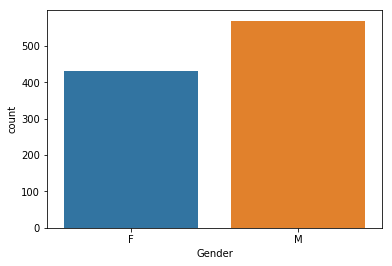

In [9]:
#count of  Gender
sns.countplot('Gender',data=train_df)
train_df['Gender'].value_counts()

Buddhist     599
Christian    152
Hindu        143
Other         65
Islam         41
Name: Religon, dtype: int64

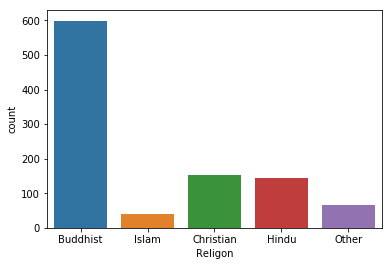

In [10]:
#count of Religon
sns.countplot('Religon',data=train_df)
train_df['Religon'].value_counts()

Sinhalese    626
Burger       163
Tamil        143
Muslim        41
Other         27
Name: Race, dtype: int64

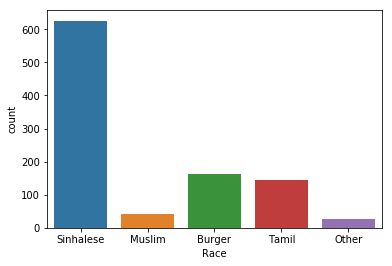

In [11]:
#count of Race
sns.countplot('Race',data=train_df)
train_df['Race'].value_counts()

Unemployed persons                                                                                           227
Agricultural Animal Husbandry Fisherman & related Forestry workers                                           108
Pensioners                                                                                                   102
Administrative Executive Managerial & related workers                                                         70
Clerical & related workers (Stenographers/ Typists etc)                                                       65
Production process workers Craftsman & related workers transport equipment operators & labourers              63
Security Personnel                                                                                            61
Sales worker                                                                                                  50
Service workers (Cooks/Tailors/Barbers/ etc)                                                    

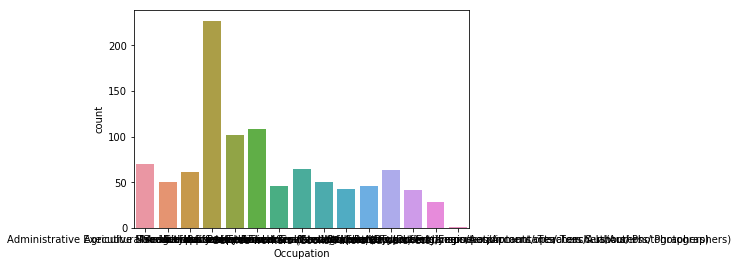

In [12]:
#count of Occupation
sns.countplot('Occupation',data=train_df)
train_df['Occupation'].value_counts()

Married      454
Unmarried    305
Widow        143
Divourced     98
Name: Civil Status, dtype: int64

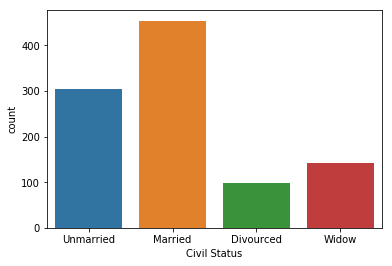

In [13]:
#count of Civil status
sns.countplot('Civil Status',data=train_df)
train_df['Civil Status'].value_counts()

In [14]:
Suicide = train_df[train_df['Suicide'] == 1]
not_Suicide = train_df[train_df['Suicide'] == 0]

print ("Suicide: %i (%.1f%%)"%(len(Suicide), float(len(Suicide))/len(train_df)*100.0))
print ("Not Suicide: %i (%.1f%%)"%(len(not_Suicide), float(len(not_Suicide))/len(train_df)*100.0))
print ("Total: %i"%len(train_df))

Suicide: 500 (50.0%)
Not Suicide: 500 (50.0%)
Total: 1000


In [15]:
train_df.Religon.value_counts()

Buddhist     599
Christian    152
Hindu        143
Other         65
Islam         41
Name: Religon, dtype: int64

# Gender and Suicide

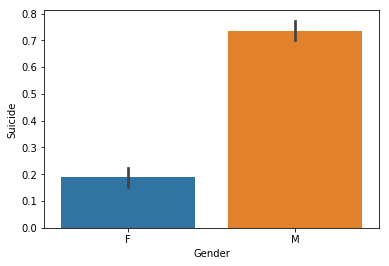

In [16]:
train_df.Gender.value_counts()
train_df.groupby('Gender').Suicide.value_counts()
train_df[['Gender', 'Suicide']].groupby(['Gender'], as_index=False).mean()

#train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Gender', y='Suicide', data=train_df)

# Anger and Suicide 

In [17]:
train_df.groupby('Anger').Suicide.value_counts()

Anger  Suicide
0      0          439
       1          247
1      1          253
       0           61
Name: Suicide, dtype: int64

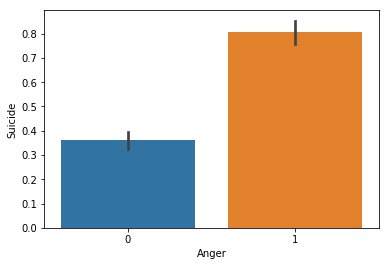

In [18]:
train_df.Gender.value_counts()
train_df.groupby('Anger').Suicide.value_counts()
train_df[['Anger', 'Suicide']].groupby(['Anger'], as_index=False).mean()
sns.barplot(x='Anger', y='Suicide', data=train_df)
 
#'Age', 'Gender', 'Religon', 'Race', 'Occupation' ,'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
#    'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
#    'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption','Anger',
#   'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated' , 'Suicide'

# Religon and Suicide

In [19]:
train_df.groupby('Religon').Suicide.value_counts()

Religon    Suicide
Buddhist   1          476
           0          123
Christian  0          152
Hindu      0          120
           1           23
Islam      0           40
           1            1
Other      0           65
Name: Suicide, dtype: int64

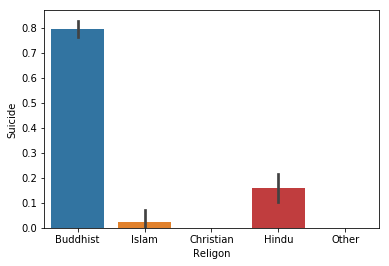

In [20]:
train_df.Gender.value_counts()
train_df.groupby('Religon').Suicide.value_counts()
train_df[['Religon', 'Suicide']].groupby(['Religon'], as_index=False).mean()
sns.barplot(x='Religon', y='Suicide', data=train_df)

# Race and Suicide 

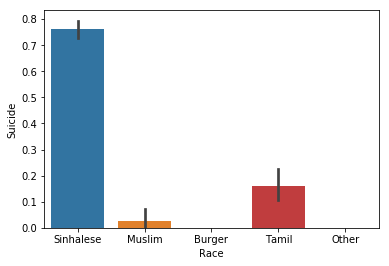

In [21]:
train_df.Gender.value_counts()
train_df.groupby('Race').Suicide.value_counts()
train_df[['Race', 'Suicide']].groupby(['Race'], as_index=False).mean()
sns.barplot(x='Race', y='Suicide', data=train_df)

In [22]:
train_df.groupby('Race').Suicide.value_counts()

Race       Suicide
Burger     0          163
Muslim     0           40
           1            1
Other      0           27
Sinhalese  1          476
           0          150
Tamil      0          120
           1           23
Name: Suicide, dtype: int64

# Sleep Problem and Suicide 
1- have sleep problem
0- not having sleep problem

In [23]:
Suicide = train_df[train_df['Suicide'] == 1]
not_Suicide = train_df[train_df['Suicide'] == 0]

print ("Suicide: %i (%.1f%%)"%(len(Suicide), float(len(Suicide))/len(train_df)*100.0))
print ("Not Suicide: %i (%.1f%%)"%(len(not_Suicide), float(len(not_Suicide))/len(train_df)*100.0))
print ("Total: %i"%len(train_df))

train_df.groupby('Sleep Problem').Suicide.value_counts()


Suicide: 500 (50.0%)
Not Suicide: 500 (50.0%)
Total: 1000


Sleep Problem  Suicide
0              0          305
               1           97
1              1          403
               0          195
Name: Suicide, dtype: int64

In [24]:
train_df[['Sleep Problem', 'Suicide']].groupby(['Sleep Problem'], as_index=False).mean()

,Sleep Problem,Suicide
0,0,0.241294
1,1,0.673913


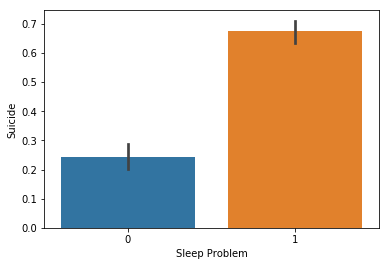

In [25]:
sns.barplot(x='Sleep Problem', y='Suicide', data=train_df)

# Occupation and Suicide 

In [26]:
train_df.groupby('Occupation').Suicide.value_counts()

Occupation                                                                                                 Suicide
Administrative Executive Managerial & related workers                                                      0           59
                                                                                                           1           11
Agricultural Animal Husbandry Fisherman & related Forestry workers                                         1           92
                                                                                                           0           16
Armed Services                                                                                             0           35
                                                                                                           1           11
Clerical & related workers (Stenographers/ Typists etc)                                                    0           58
                               

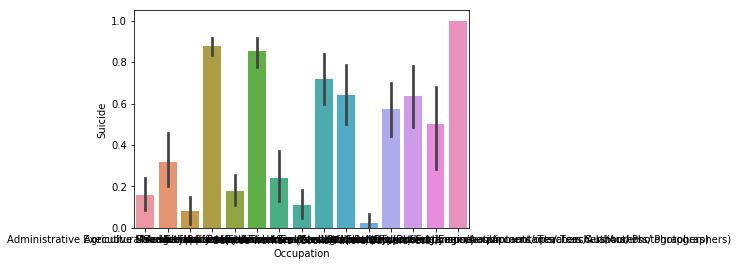

In [27]:
sns.barplot(x='Occupation', y='Suicide', data=train_df)

# Civil Status and Suicide  

In [28]:
train_df.groupby('Civil Status').Suicide.value_counts()

Civil Status  Suicide
Divourced     0           96
              1            2
Married       1          344
              0          110
Unmarried     0          154
              1          151
Widow         0          140
              1            3
Name: Suicide, dtype: int64

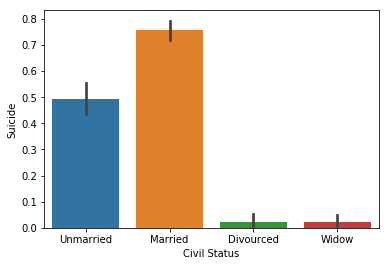

In [29]:
sns.barplot(x='Civil Status', y='Suicide', data=train_df)

# Education Level and Suicide

In [30]:
train_df.groupby('Education Level').Suicide.value_counts()

Education Level             Suicide
From Grade 1 to 7           1          125
                            0           69
Other                       0           60
                            1           11
Passed G.C.E (A/L)          0          107
                            1           16
Passed G.C.E (O/L)          1          141
                            0           46
Passed Grade 8              1          174
                            0           54
School not attended         0           52
                            1           28
University Degree or above  0          112
                            1            5
Name: Suicide, dtype: int64

# Reason and Suicide

In [31]:
train_df.groupby('Reason').Suicide.value_counts()

Reason                                                        Suicide
Addiction to narcotic drugs                                   1           26
                                                              0           25
Aggrieved over the death parents/relations                    1           10
Alzheimer's disease                                           0           27
Asthma                                                        0           35
Chronic diseases & Physical disabilities                      1           74
Chronic kidney disease                                        0           26
Cirrhosis                                                     0           20
Diabetes                                                      0           23
Economic problems (Poverty indebtedness)                      1           26
Employment problems                                           1            1
Failure at the examination                                    1            2
Harras

# Lifetime Psychiatric Hospitalizations and Suicide

In [32]:
train_df.groupby('Lifetime Psychiatric Hospitalizations').Suicide.value_counts()

Lifetime Psychiatric Hospitalizations  Suicide
0                                      0          473
                                       1          339
1                                      1          161
                                       0           27
Name: Suicide, dtype: int64

# Past Suicide Attempts and Suicide

In [33]:
train_df.groupby('Past Suicide Attempts').Suicide.value_counts()

Past Suicide Attempts  Suicide
0                      1          413
                       0          374
1                      0          126
                       1           87
Name: Suicide, dtype: int64

# Any suicidal thoughts mentioned and Suicide

In [34]:
train_df.groupby('Any suicidal thoughts mentioned').Suicide.value_counts()

Any suicidal thoughts mentioned  Suicide
0                                0          456
                                 1          260
1                                1          240
                                 0           44
Name: Suicide, dtype: int64

# Self-Injurious Behaviour and Suicide

In [35]:
train_df.groupby('Self-Injurious Behaviour').Suicide.value_counts()

Self-Injurious Behaviour  Suicide
0                         0          474
                          1          300
1                         1          200
                          0           26
Name: Suicide, dtype: int64

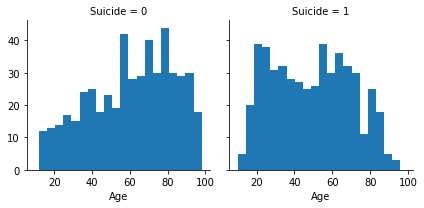

In [36]:
g = sns.FacetGrid(train_df, col='Suicide')
g.map(plt.hist, 'Age', bins=20)

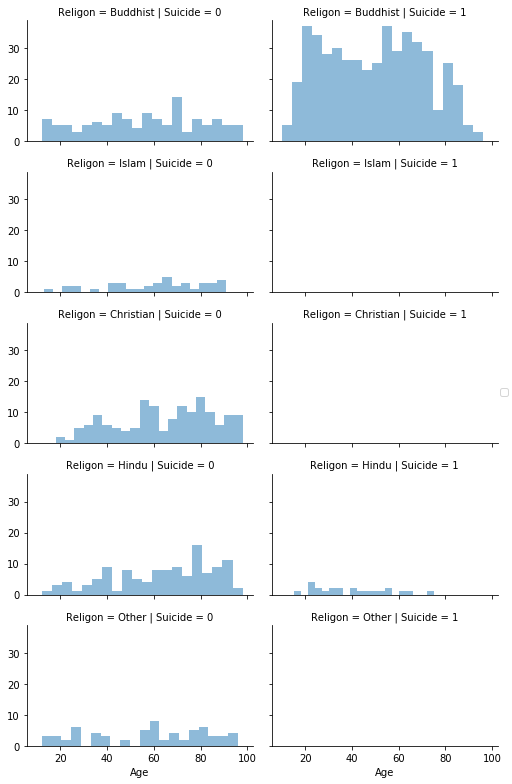

In [37]:
grid = sns.FacetGrid(train_df, col='Suicide', row='Religon', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [38]:
categoricals = []
for col, col_type in train_df.dtypes.iteritems():
     if col_type == 'O':
          categoricals.append(col)
     else:
          train_df[col].fillna(0, inplace=True)

In [39]:
train_df.head()

,Age,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,...,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Suicide
0,30,F,Buddhist,Sinhalese,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,0,0,...,0,None,Asthma,None,0,0,0,0,0,0
1,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,0,0,...,0,None,Other,None,0,1,0,0,0,0
2,85,M,Buddhist,Sinhalese,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,0,0,...,0,None,Diabetes,None,0,1,0,0,0,0
3,87,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,0,0,...,0,None,Chronic pain,Frequent,1,1,1,1,1,1
4,59,F,Buddhist,Sinhalese,Pensioners,Unmarried,Other,Alzheimer's disease,0,1,...,0,None,COPD,None,0,1,0,1,1,0


# Converting to Numeric Data

In [40]:
category_col =['Gender', 'Religon', 'Race', 'Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    train_df[col] = labelEncoder.fit_transform( train_df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print( train_df.head(20))

    Age  Gender  Religon  Race  Occupation  Civil Status  Education Level  \
0    30       0        0     3           0             2                0   
1    91       0        3     1           8             1                6   
2    85       1        0     3           9             1                6   
3    87       1        0     3          12             1                5   
4    59       0        0     3           4             2                1   
5    31       1        0     3           1             2                3   
6    75       0        1     0           2             0                2   
7    47       1        0     3          12             1                5   
8    58       0        1     0           2             2                6   
9    36       0        2     4           2             3                6   
10   87       1        0     3          12             1                4   
11   73       0        1     0           3             3                4   

In [41]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spliting to Train data and Test data

In [42]:
#Splitting out training data into X: features and y: target
X = train_df.values[:, 2:20]
y = train_df.values[:,20]


#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100,shuffle=True)

In [43]:
train_df = pd.get_dummies(train_df)
print(train_df)

     Age  Gender  Religon  Race  Occupation  Civil Status  Education Level  \
0     30       0        0     3           0             2                0   
1     91       0        3     1           8             1                6   
2     85       1        0     3           9             1                6   
3     87       1        0     3          12             1                5   
4     59       0        0     3           4             2                1   
5     31       1        0     3           1             2                3   
6     75       0        1     0           2             0                2   
7     47       1        0     3          12             1                5   
8     58       0        1     0           2             2                6   
9     36       0        2     4           2             3                6   
10    87       1        0     3          12             1                4   
11    73       0        1     0           3             3       

In [44]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Logistic Regression

In [46]:
from sklearn import datasets, linear_model, metrics
# create logistic regression object 
reg = linear_model.LogisticRegression() 
   
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = reg.predict(X_test) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 92.0


In [47]:
import pickle
#creating and training a model
#serializing our model to a file called model.pkl
pickle.dump(reg, open("model.pkl","wb"))

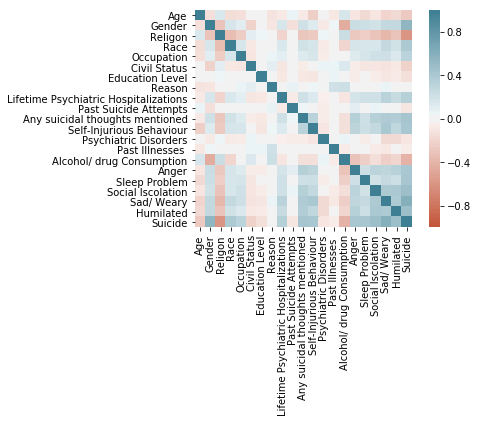

In [48]:
corr = train_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [50]:
print(reg.predict([[87,1,1,1,12,16,5,6,0,0,0,3,2,0,1,1,0,0]]))

[0]


In [53]:
print(reg.predict([[30,1,0,0,11,2,16,1,0,1,1,1,3,2,1,0,1,0]]))

[0]
